In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [5]:
#first few rows to check data

df.head(5)

In [6]:
#Analyze data columns rows
df.shape


(101766, 50)

In [7]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
#missing values in data
df.isnull().sum().sum()

0

In [10]:
df.groupby(['gender'])['diabetesMed'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: diabetesMed, dtype: int64

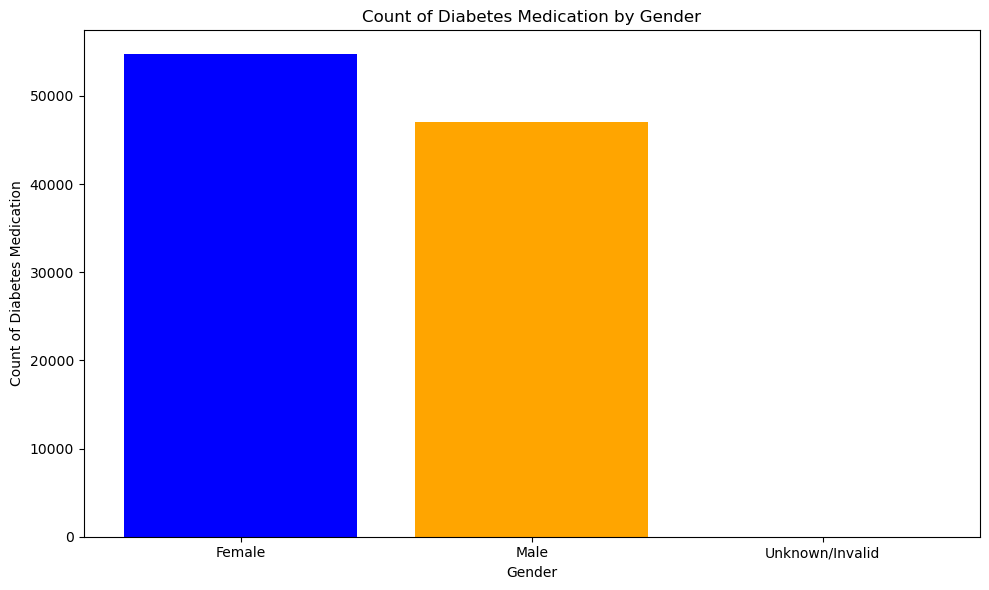

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'gender' and count the 'diabetesMed'
gender_diabetes_count = df.groupby(['gender'])['diabetesMed'].count().reset_index()
# Plot the data as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(gender_diabetes_count['gender'], gender_diabetes_count['diabetesMed'], color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count of Diabetes Medication')
plt.title('Count of Diabetes Medication by Gender')
plt.tight_layout()
# Show the plot
plt.show()

In [12]:
df['gender'].describe()


count     101766
unique         3
top       Female
freq       54708
Name: gender, dtype: object

In [13]:
df['diabetesMed'].describe


<bound method NDFrame.describe of 0          No
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
101761    Yes
101762    Yes
101763    Yes
101764    Yes
101765     No
Name: diabetesMed, Length: 101766, dtype: object>

In [14]:
df.groupby('gender').count()

,encounter_id,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
gender,,,,,,,,,,,,,,,,,,,,,
Female,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,...,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708
Male,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,...,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055
Unknown/Invalid,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [15]:
df.shape


(101766, 50)

In [16]:
#Encounter ID seems like mbr id.
df['encounter_id'].is_unique

True

In [17]:
df = df.set_index('encounter_id')
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


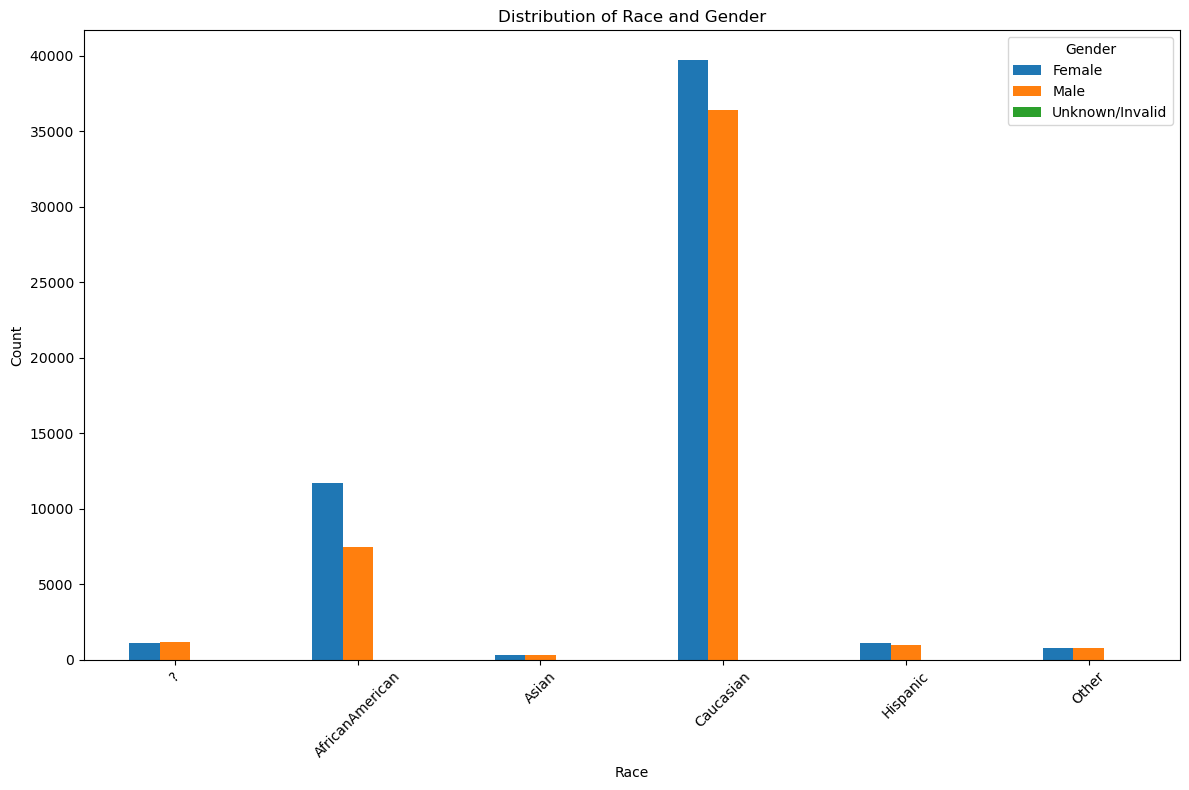

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'race' and 'gender' and count the occurrences
race_gender_count = df.groupby(['race', 'gender']).size().unstack(fill_value=0)
# Plot the data as a grouped bar plot
race_gender_count.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race and Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
#Summary
## it is found that Female have higher numbers than male across African American, Caucasian and Hispanic community
## The plots combine Race/Ethnicity with Gender to show the clarity